In [1]:
import matplotlib
import numpy as np
import math

In [2]:
u=lambda x,t: np.sin(2*np.pi*(x+t))

In [6]:
T=1
J=80
h=1/J
r=1.5
dt=r*h
x=np.arange(0,1,h)  # which means [0,1) with step h
v=np.zeros((J,int(T/dt)))
v[:,0]=u(x,0)

In [10]:
# v^1 for FTFS
for j in range(1,J-1):
    v[j,1]=v[j,0]+r/2*(v[j+1,0]-v[j,0])
v[0,1]=v[0,0]+r/2*(v[1,0]-v[0,0])
v[J-1,1]=v[J-1,0]+r/2*(v[0,0]-v[J-1,0])

# v^n, n>=2 for CTCS
for n in range(2,int(T/dt)):
    for j in range(1,J-1):
        v[j,n]=v[j,n-2]+r*(v[j+1,n-1]-v[j-1,n-1])
    v[0,n]=v[0,n-2]+r*(v[1,n-1]-v[J-1,n-1])
    v[J-1,n]=v[J-1,n-2]+r*(v[0,n-1]-v[J-2,n-1])

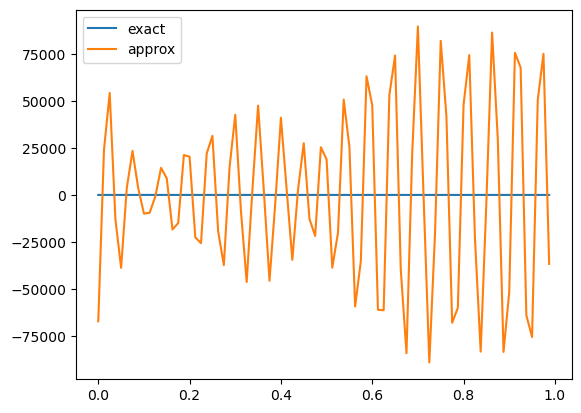

In [11]:
import matplotlib.pyplot


matplotlib.pyplot.plot(x,v[:,1],x,v[:,int(T/dt)-1])
matplotlib.pyplot.legend(['exact','approx'])
matplotlib.pyplot.show()